In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv('Salaries.csv')
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rank           397 non-null    object
 1   discipline     397 non-null    object
 2   yrs.since.phd  397 non-null    int64 
 3   yrs.service    397 non-null    int64 
 4   sex            397 non-null    object
 5   salary         397 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 18.7+ KB


In [5]:
df['yrs.since.phd'].unique()

array([19, 20,  4, 45, 40,  6, 30, 21, 18, 12,  7,  1,  2, 38, 37, 39, 31,
       36, 34, 24, 13, 35,  5, 11, 22, 41,  9, 23, 25, 28, 16, 14, 10,  8,
        3, 33, 17, 29, 26, 43, 15, 42, 32, 54, 56, 27, 48, 46, 47, 52, 51,
       49, 44], dtype=int64)

In [6]:
df['rank'].unique()   # we will encode this  like  Prof:1, AsstProf: 3, AssocProf: 2

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [7]:
df['discipline'].unique()  # seems A is good discipline professor

array(['B', 'A'], dtype=object)

In [8]:
df['sex'].unique()

array(['Male', 'Female'], dtype=object)

# Null Values

In [9]:
df.isnull().sum()   # No null values

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

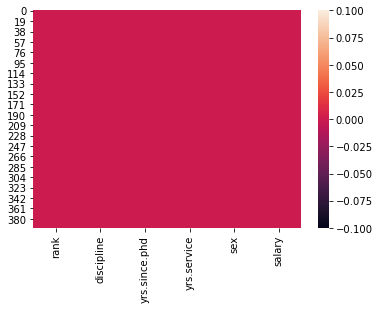

In [10]:
sns.heatmap(df.isnull())

# Univariate Analysis()

<AxesSubplot:xlabel='rank', ylabel='salary'>

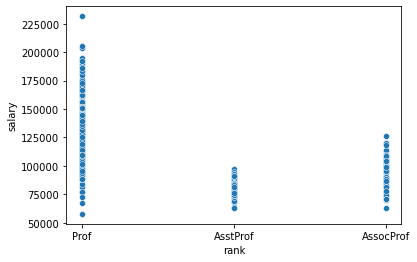

In [12]:
sns.scatterplot(x='rank',y='salary',data=df)

<AxesSubplot:xlabel='discipline', ylabel='count'>

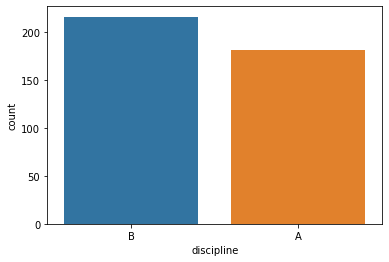

In [13]:
sns.countplot(x='discipline', data=df) # More professiors have discipline B

<AxesSubplot:xlabel='rank', ylabel='count'>

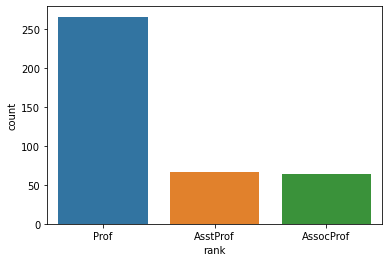

In [14]:
sns.countplot('rank', data=df)

In [15]:
df['rank'].value_counts()  # Prof count is 266, associate prof is 64  and associate prof is 67

Prof         266
AsstProf      67
AssocProf     64
Name: rank, dtype: int64

<AxesSubplot:xlabel='rank', ylabel='count'>

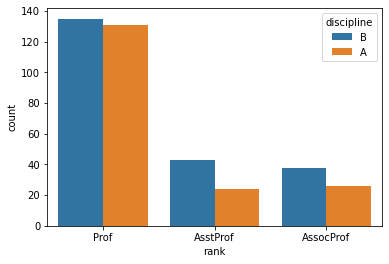

In [16]:
sns.countplot(x='rank',hue='discipline', data=df)

In [17]:
# Mostly prof, assoprof, asstprof have discipline B

<AxesSubplot:xlabel='rank', ylabel='yrs.service'>

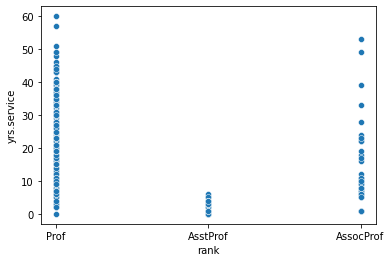

In [18]:
sns.scatterplot(x='rank',y='yrs.service', data=df)

<AxesSubplot:xlabel='sex', ylabel='count'>

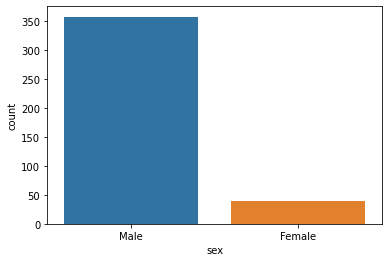

In [19]:
# Male vs Female in rank
sns.countplot(x='sex',data=df)  # We have majority of Male Proff

In [20]:
gender=df['sex'].value_counts().index

In [21]:
gender

Index(['Male', 'Female'], dtype='object')

In [22]:
gender_value= df['sex'].value_counts().values
gender_value

array([358,  39], dtype=int64)

([<matplotlib.patches.Wedge at 0x2a1cac62b20>,
 [Text(-1.0480290059707078, 0.3341185457948273, 'Male'),
  Text(1.0480289825088784, -0.3341186193874942, 'Female')],
 [Text(-0.5716521850749315, 0.18224647952445122, '90.18%'),
  Text(0.57165217227757, -0.1822465196659059, '9.82%')])

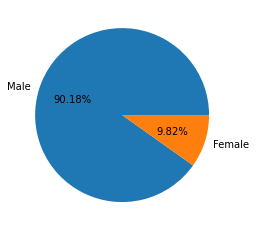

In [23]:
plt.pie(gender_value, labels=gender, autopct="%1.2f%%")

In [24]:
# Conslusion:  90% are Male professor and 10% are female professor

In [25]:
rank=df['rank'].value_counts().index

In [26]:
rankvalue=df['rank'].value_counts().values

([<matplotlib.patches.Wedge at 0x2a1caadc8b0>,
 [Text(-0.5600204235664406, 0.9467719499375045, 'Prof'),
  Text(0.030462284581484863, -1.0995781232900539, 'AsstProf'),
  Text(0.9619174276875219, -0.5335867898580523, 'AssocProf')],
 [Text(-0.30546568558169485, 0.5164210636022751, '67.00%'),
  Text(0.01661579158990083, -0.5997698854309383, '16.88%'),
  Text(0.5246822332841028, -0.291047339922574, '16.12%')])

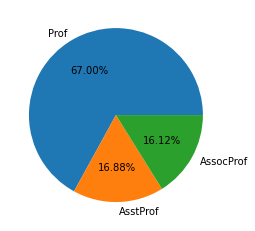

In [27]:
plt.pie(rankvalue, labels=rank, autopct="%1.2f%%")

In [28]:
# Conclusion:  67% are professor, 16.88 are asst professor while 16.12% are associate professor

<AxesSubplot:xlabel='rank', ylabel='count'>

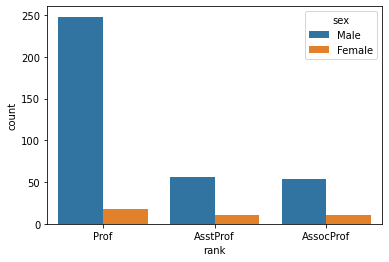

In [29]:
sns.countplot(x='rank',hue='sex', data=df)

<AxesSubplot:xlabel='rank', ylabel='salary'>

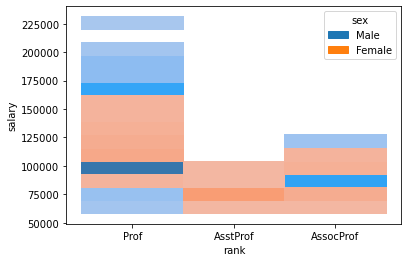

In [30]:
sns.histplot(x='rank',y='salary',hue='sex', data=df)

In [31]:
df.groupby(['rank','sex'])['sex'].count()

rank       sex   
AssocProf  Female     10
           Male       54
AsstProf   Female     11
           Male       56
Prof       Female     18
           Male      248
Name: sex, dtype: int64

In [32]:
# Observation: Although femals are only 10% in which more Female are Professor

In [33]:

df.head()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


# Columns vs Salary

In [34]:
#Mean salary of rankwise
df.groupby('rank')['salary'].mean()

rank
AssocProf     93876.437500
AsstProf      80775.985075
Prof         126772.109023
Name: salary, dtype: float64

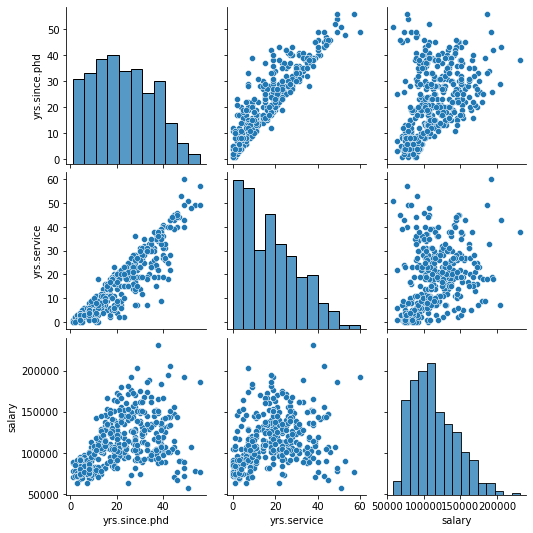

In [35]:
sns.pairplot(df)

<AxesSubplot:xlabel='yrs.since.phd', ylabel='Density'>

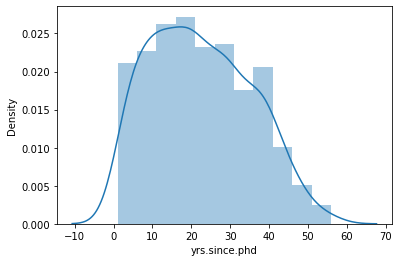

In [36]:

sns.distplot(df['yrs.since.phd'])

<AxesSubplot:xlabel='yrs.service', ylabel='Density'>

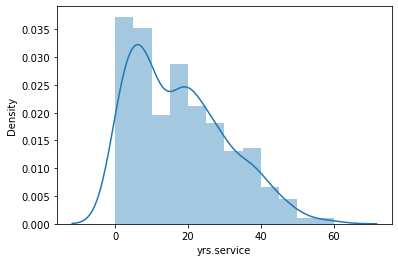

In [37]:
sns.distplot(df['yrs.service'])

<AxesSubplot:xlabel='salary', ylabel='Density'>

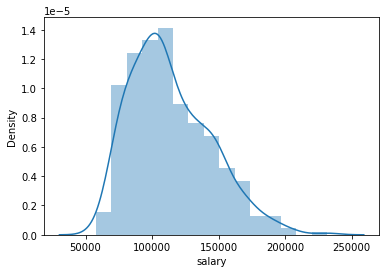

In [38]:

sns.distplot(df['salary'])

In [39]:

# Skewness present in coulumns

In [40]:
df.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [41]:
df.corr()

,yrs.since.phd,yrs.service,salary
yrs.since.phd,1.000000,0.909649,0.419231
yrs.service,0.909649,1.000000,0.334745
salary,0.419231,0.334745,1.000000


<AxesSubplot:>

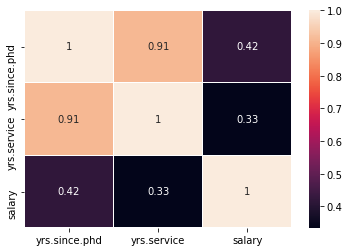

In [42]:
sns.heatmap(df.corr(), annot=True, linecolor='white',linewidths=.25)

In [43]:
df.drop('yrs.service',axis=1, inplace=True)

In [44]:
df.head()

,rank,discipline,yrs.since.phd,sex,salary
0,Prof,B,19,Male,139750
1,Prof,B,20,Male,173200
2,AsstProf,B,4,Male,79750
3,Prof,B,45,Male,115000
4,Prof,B,40,Male,141500


In [45]:
df_cat=df[[column for column in df.columns if df[column].dtypes=='O']]
df_cat

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [46]:
df_num=df[[column for column in df.columns if df[column].dtypes !='O' ]]
df_num

,yrs.since.phd,salary
0,19,139750
1,20,173200
2,4,79750
3,45,115000
4,40,141500
...,...,...
392,33,103106
393,31,150564
394,42,101738
395,25,95329


# Outliers checking

<AxesSubplot:>

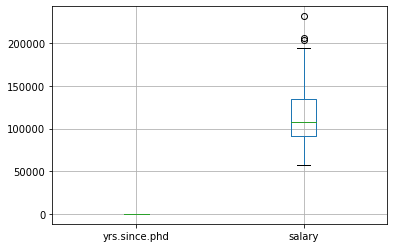

In [47]:
df_num.boxplot()

<AxesSubplot:xlabel='yrs.since.phd'>

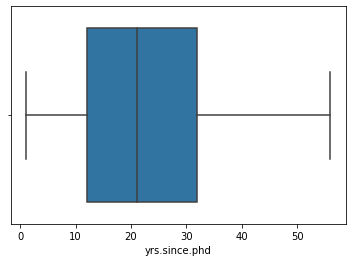

In [48]:
sns.boxplot(df['yrs.since.phd'],orient='h' )

<AxesSubplot:xlabel='salary'>

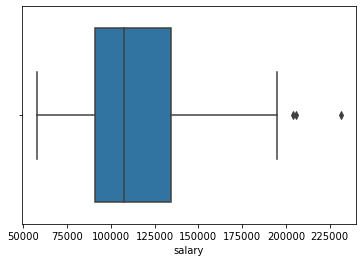

In [49]:
sns.boxplot(df['salary'],orient='h' )

In [50]:
# Conclusion:  Salary have few outliers, we need to handle them
df_num.skew()

yrs.since.phd    0.300880
salary           0.714568
dtype: float64

In [51]:
#Replacing outlier with higher cap (90%) here as outliers are above.

df_num['salary'].quantile(.90)

152946.00000000003

In [52]:
df_num['salary'].max()

231545

In [53]:
#df['salary']= np.where(df['salary']>high,high,df['salary'])

# (IQR) proximity rule.

The data points which fall below Q1 – 1.5 IQR or above Q3 + 1.5 IQR are outliers.

<AxesSubplot:xlabel='salary', ylabel='Density'>

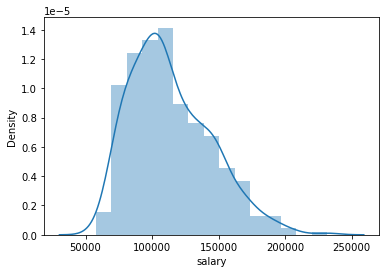

In [54]:
sns.distplot(df_num['salary'])

In [55]:
IQR= df.salary.quantile(.75)- df.salary.quantile(.25)
IQR

43185.0

In [56]:
# Q3 + 1.5 IQR are outliers.

upper_cap= df_num['salary'].quantile(.75)+ (1.5 * IQR)
upper_cap

198962.5

In [57]:
# Replace outliers with upper cap

df_num['salary']= np.where(df_num['salary']>upper_cap,upper_cap,df_num['salary']  )

<AxesSubplot:xlabel='salary', ylabel='Density'>

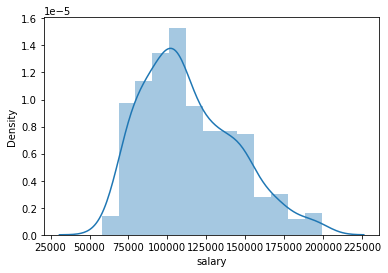

In [58]:
sns.distplot(df_num['salary'])

In [59]:
df_num.skew()

yrs.since.phd    0.300880
salary           0.630253
dtype: float64

In [60]:
# It has removed some skewness from salary column, from .7145  to  .63.0

In [61]:

df_num

,yrs.since.phd,salary
0,19,139750.0
1,20,173200.0
2,4,79750.0
3,45,115000.0
4,40,141500.0
...,...,...
392,33,103106.0
393,31,150564.0
394,42,101738.0
395,25,95329.0


In [62]:
#Points
x=df_num.iloc[:,:-1]
y=df_num.iloc[:,-1]

# we need to add categoricals columns to X after encoding

In [63]:
x

,yrs.since.phd
0,19
1,20
2,4
3,45
4,40
...,...
392,33
393,31
394,42
395,25


# Transformation()

In [64]:
from sklearn.preprocessing import power_transform
x=power_transform(x, method='box-cox')

# Standardization()

In [65]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)
x

array([[-0.12294314],
       [-0.04529591],
       [-1.63292287],
       [ 1.5595717 ],
       [ 1.27543796],
       [-1.36388746],
       [ 0.66017251],
       [ 1.5595717 ],
       [ 0.03080915],
       [-0.20224757],
       [-0.72175875],
       [-1.24319611],
       [-2.18500357],
       [-1.9654573 ],
       [-0.04529591],
       [-0.72175875],
       [-0.12294314],
       [ 1.15783006],
       [ 1.09809659],
       [ 1.21693637],
       [ 0.72506668],
       [ 1.03771209],
       [ 0.91488629],
       [ 0.25083761],
       [-0.6289452 ],
       [ 0.03080915],
       [ 0.97665107],
       [-1.49296969],
       [-0.81773087],
       [-0.72175875],
       [-0.04529591],
       [-1.24319611],
       [-0.6289452 ],
       [-1.63292287],
       [-1.63292287],
       [-1.49296969],
       [ 0.10547402],
       [-1.24319611],
       [ 1.33335589],
       [-1.02089518],
       [ 0.17878967],
       [ 0.17878967],
       [ 1.27543796],
       [ 1.15783006],
       [-0.12294314],
       [ 0

In [66]:
x=pd.DataFrame(x)

# Lets encode for categorical features

In [67]:
df_cat

,rank,discipline,sex
0,Prof,B,Male
1,Prof,B,Male
2,AsstProf,B,Male
3,Prof,B,Male
4,Prof,B,Male
...,...,...,...
392,Prof,A,Male
393,Prof,A,Male
394,Prof,A,Male
395,Prof,A,Male


In [68]:
df_cat['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [69]:
df_cat['rank']=df_cat['rank'].map({'AsstProf':1,'AssocProf':2,'Prof':3})

In [70]:
df_cat['discipline']= df_cat['discipline'].map({'B':1,'A':2})

In [71]:
df_cat['sex_onehot']=   pd.get_dummies(df_cat['sex'],drop_first=True)

In [72]:
df_cat.drop('sex', axis=1,inplace=True)

In [73]:
df_cat

,rank,discipline,sex_onehot
0,3,1,1
1,3,1,1
2,1,1,1
3,3,1,1
4,3,1,1
...,...,...,...
392,3,2,1
393,3,2,1
394,3,2,1
395,3,2,1


In [74]:
# Combine total inputs
x=pd.concat([df_cat,x],axis=1)

In [75]:
x.shape

(397, 4)

In [76]:
y.shape

(397,)

In [77]:
x

,rank,discipline,sex_onehot,0
0,3,1,1,-0.122943
1,3,1,1,-0.045296
2,1,1,1,-1.632923
3,3,1,1,1.559572
4,3,1,1,1.275438
...,...,...,...,...
392,3,2,1,0.852389
393,3,2,1,0.725067
394,3,2,1,1.390710
395,3,2,1,0.321691


In [78]:
y= pd.DataFrame(y)
y

,salary
0,139750.0
1,173200.0
2,79750.0
3,115000.0
4,141500.0
...,...
392,103106.0
393,150564.0
394,101738.0
395,95329.0


# Machine Learning

In [79]:
# This is a regression problem statement

In [80]:
# For Train Test split, need to find best Random state value

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr=LinearRegression()

In [81]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=55, test_size=.20)
lr.fit(x_train,y_train)

LinearRegression()

In [82]:
ppp=lr.predict(x_test)

In [83]:
mean_squared_error(y_test,ppp)

549153321.2192999

In [84]:
mean_absolute_error(y_test,ppp)

17701.98329299539

In [85]:
for i in range(0,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i, test_size=.20)
    lr.fit(x_train,y_train)
    predict_train=lr.predict(x_train)
    predict_test=lr.predict(x_test)
    if round(mean_squared_error(y_train,predict_train)*100,10)== round(mean_squared_error(y_test,predict_test)*100,10):
        print("At random state ", i, "The model performance very well")
        print("At random state: ",i)
        print("Training Mean squared error is: ", round(mean_squared_error(y_train,predict_train)*100,2))
        print('Test Mean squared error is: ', round(mean_squared_error(y_test,predict_test)*100,2))
        print('X'*50,'\n')
    

In [86]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import LassoCV,RidgeCV

In [87]:
r= Ridge()
r.fit(x_train,y_train)

Ridge()

In [88]:
mean_squared_error(y_test,r.predict(x_test))

400610981.3032884

In [89]:
l= Lasso()
l.fit(x_train,y_train)

Lasso()

In [90]:
mean_squared_error(y_test,l.predict(x_test))

400758746.7474326

In [91]:
from sklearn.tree import DecisionTreeRegressor

In [92]:
DT= DecisionTreeRegressor()

In [93]:
DT.fit(x_train,y_train)

DecisionTreeRegressor()

In [94]:
DT.predict(x_test)

array([101335.66666667, 120484.83333333, 129687.25      , 146856.        ,
        88021.        , 143100.        , 124827.        , 146856.        ,
       127880.        , 142057.5       ,  85459.7       , 115470.66666667,
       127377.        ,  73928.        , 131888.        , 127601.        ,
       142057.5       , 145829.        , 128250.        , 111512.        ,
        87529.5       , 142221.5       , 122878.66666667,  85459.7       ,
        81500.        , 108550.5       , 140889.        ,  74500.        ,
       108550.5       , 140889.        ,  75182.75      ,  91145.        ,
       105000.        , 145156.66666667, 110515.        , 110515.        ,
        88021.        ,  82850.        ,  80225.        , 148800.        ,
        70700.        ,  74692.        ,  75182.75      ,  85459.7       ,
       116790.5       , 113869.66666667, 127601.        ,  90236.5       ,
        83672.        ,  62884.        , 115942.5       , 120833.        ,
       165500.        , 1

In [95]:
mean_squared_error(y_test,DT.predict(x_test))

497272629.7300655